## Correlation based

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
dataset = X
dataset["target"] = y

In [ ]:
dataset.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [ ]:
dataset.shape

(569, 31)

[]

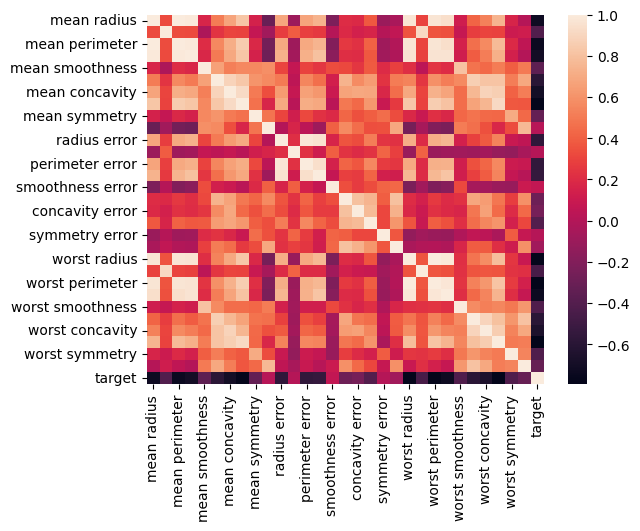

In [ ]:
data_corr = dataset.corr()
sns.heatmap(data_corr)
plt.plot()

In [ ]:
top_5 = abs(data_corr['target']).sort_values(ascending=False).iloc[:5]
print(top_5)

target                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
Name: target, dtype: float64


In [ ]:
threshold = 0.7
corr_features = data_corr.index[abs(data_corr['target']) > threshold]
corr_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area', 'worst concave points',
       'target'],
      dtype='object')

## Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert to a Series for easy handling
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

print(mi_series.head(5))

target                 0.661196
worst perimeter        0.478604
worst area             0.463900
worst radius           0.450458
mean concave points    0.440121
dtype: float64


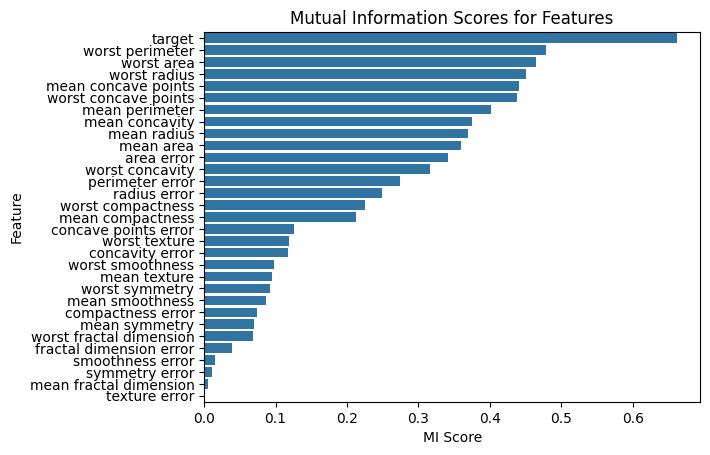

In [ ]:
sns.barplot(x=mi_series, y=mi_series.index)
plt.title("Mutual Information Scores for Features")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Select Top-K Features
top_k = 10
selected_features = mi_series.head(top_k).index.tolist()
X_selected = X[selected_features]
print(X_selected.columns)

Index(['target', 'worst perimeter', 'worst area', 'worst radius',
       'mean concave points', 'worst concave points', 'mean perimeter',
       'mean concavity', 'mean radius', 'mean area'],
      dtype='object')


In [ ]:
# Threshold-Based Filtering
threshold = 0.05
selected_features = mi_series[mi_series > threshold].index.tolist()
print(selected_features)

['target', 'worst perimeter', 'worst area', 'worst radius', 'mean concave points', 'worst concave points', 'mean perimeter', 'mean concavity', 'mean radius', 'mean area', 'area error', 'worst concavity', 'perimeter error', 'radius error', 'worst compactness', 'mean compactness', 'concave points error', 'worst texture', 'concavity error', 'worst smoothness', 'mean texture', 'worst symmetry', 'mean smoothness', 'compactness error', 'mean symmetry', 'worst fractal dimension']


## Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd

In [ ]:
# Sample dataset
X = pd.DataFrame({
    'feature_1': [1, 1, 1, 1, 1],       # zero variance
    'feature_2': [1, 0, 1, 0, 1],       # variance = 0.24
    'feature_3': [5, 6, 7, 8, 9],       # variance = 2.5
})

In [ ]:
# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

# Get selected feature names
selected_columns = X.columns[selector.get_support()]
X_filtered = pd.DataFrame(X_selected, columns=selected_columns)

print("Selected Features:")
print(X_filtered)

Selected Features:
   feature_2  feature_3
0          1          5
1          0          6
2          1          7
3          0          8
4          1          9


In [ ]:
(dataset.describe().loc['std']**2).sort_values(ascending=False).iloc[:5]

,std
worst area,324167.385102
mean area,123843.554318
area error,2069.431583
worst perimeter,1129.130847
mean perimeter,590.440480


In [ ]:
# Apply VarianceThreshold
selector = VarianceThreshold(threshold=590)
X_selected = selector.fit_transform(dataset)

selected_columns = dataset.columns[selector.get_support()]
X_filtered = pd.DataFrame(X_selected, columns=selected_columns)

print("Selected Features:")
print(selected_columns)

Selected Features:
Index(['mean area', 'area error', 'worst perimeter', 'worst area'], dtype='object')
